Find available dataset names in seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df = sns.load_dataset('flights')
print(df.head())
print(df.tail)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
<bound method NDFrame.tail of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]>


We get only year and month for the date, we need day also

Convert the date to a YYYY-MM-DD format in a new column named yearMonth

In [5]:
df['yearMonth'] = "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


The new yearMonth column is of type 'object' (i.e. string) - we need it in the date format

In [6]:
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
print(df.info())
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01
     year month  passengers  yearMonth
139  1960   Aug         606 1960-08-01
140  1960   Sep         508 1960-09-01
141  1960   Oct         461 1960-10-01
142  1960   Nov         390 1960-11-01
143  1960   Dec         432 1960-12-01


Make yearMonth as the dataframe index

Inplace will make the change permanent to DF

In [7]:
df.set_index('yearMonth',inplace=True)
print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


Visualize the time series

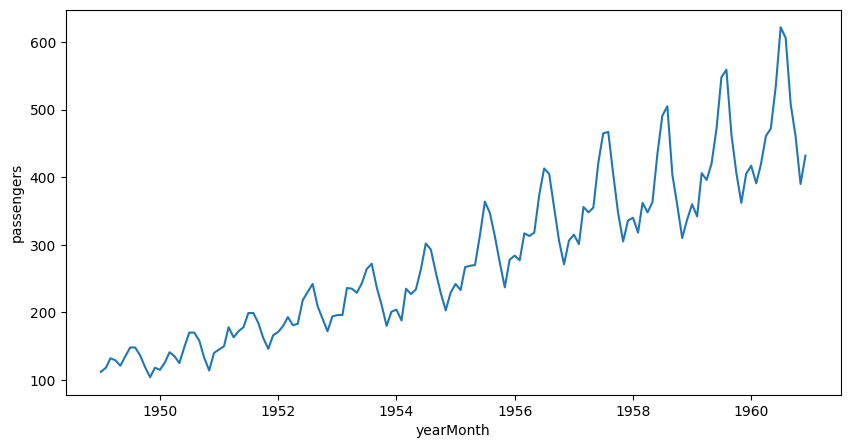

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y='passengers')
plt.show()

Check further for seasonality and trend by doing decomposition

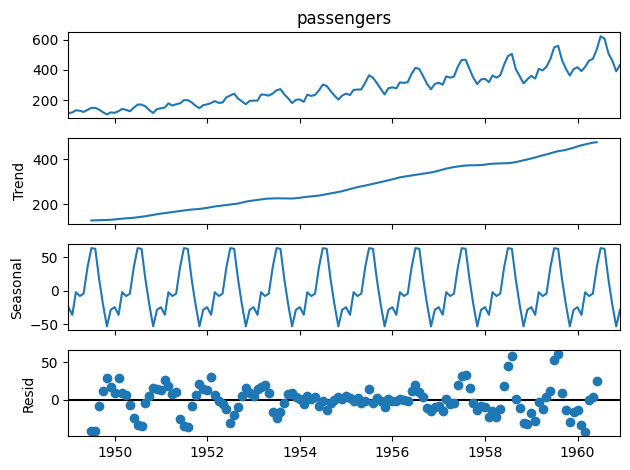

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['passengers'], period=12)
fig = decomposition.plot()
plt.show()

## Upward trend and clear seasonality


Check if the time series is stationary

Rolling mean and std Dev for 12 months

In [10]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

Plot original series with rolling mean and std

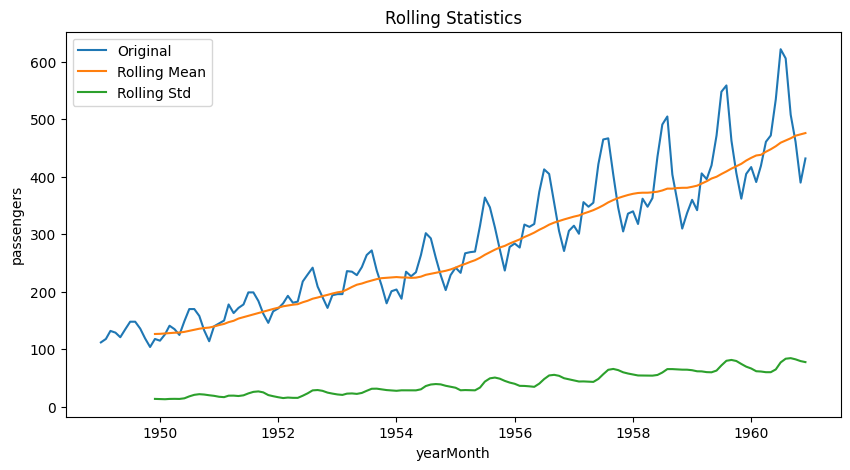

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y='passengers',label='Original')
sns.lineplot(data=df, x=df.index, y='rollMean',label='Rolling Mean')
sns.lineplot(data=df, x=df.index, y='rollStd',label='Rolling Std')
plt.title('Rolling Statistics')
plt.show()